# SPGR

In [1]:
from multiprocessing import set_start_method
set_start_method('forkserver')

In [2]:
import version_control

Last run on cashlab03-deb at 2015-04-29 17:46:32.931261

Phypno Version: 5fd34bdecf40bf72accfd82aba7495eba94acafb

Babel==1.3, Cython==0.22, Jinja2==2.7.3, Markdown==2.6.2, MarkupSafe==0.23, Pillow==2.8.1, PyOpenGL==3.1.0, Pygments==2.0.2, Sphinx==1.3.1, alabaster==0.7.3, bash-kernel==0.3, beautifulsoup4==4.3.2, biopython==1.65, certifi==2015.04.28, coverage==3.7.1, decorator==3.4.2, docutils==0.12, easydev==0.8.3, ipython==3.1.0, jedi==0.9.0, jsonschema==2.4.0, matplotlib==1.4.3, memory-profiler==0.32, mistune==0.5.1, networkx==1.9.1, nibabel==2.0.0, nitime==0.5, nltk==3.0.2, nose==1.3.6, numpy==1.9.2, numpydoc==0.5, ordereddict==1.1, pandas==0.16.0, pandocfilters==1.2.4, pep8==1.6.2, pexpect==3.3, pockets==0.2.4, psutil==2.2.1, ptyprocess==0.4, pycurl==7.19.5.1, pyflakes==0.8.1, pyparsing==2.0.3, pyqtgraph==0.9.10, python-dateutil==2.4.2, python-igraph==0.7.1-4, pytz==2015.2, pyzmq==14.6.0, requests==2.6.2, rope-py3k==0.9.4-1, rpy2==2.5.6, scikit-learn==0.16.1, scipy==0.15.1, six==1.

In [3]:
from spgr import lg

## Co-occurrence of Spindles

### Code

In [4]:
from numpy import arange, max
from spgr.detect_spindles import get_spindles
# from spgr.plot_spindles import hist_overlap
from spgr.plot_spindles import make_hist_overlap
from spgr.constants import GROUP_PATH, HEMI_SUBJ, SPINDLE_OPTIONS

from IPython.display import display

In [5]:
images_dir = GROUP_PATH.joinpath('images').joinpath('spindle_overlap')
if not images_dir.exists():
    images_dir.mkdir()

PLOT_COLOR = 'kw'

In [6]:
for REREF in ('avg', 15):
    for subj in HEMI_SUBJ:
        v = make_hist_overlap(subj, color=PLOT_COLOR, reref=REREF, nchan=40)
        v.save(str(images_dir.joinpath('hist_{}_{}.png'.format(REREF, subj))))
        display(v)

NameError: name 'testtest' is not defined

### Plots of common spindles

In [11]:
from spgr.constants import DATA_OPTIONS, HEMI_SUBJ, SPINDLE_OPTIONS, CHAN_TYPE
from spgr.detect_spindles import get_spindles
from spgr.read_data import get_chan_used_in_analysis
from spgr.spindle_source import get_morph_linear, get_chan_with_regions
from spgr.stats_on_spindles import create_spindle_groups, create_spindle_cooccurrence_matrix, mean_spindle_cooccurrence
from spgr.plot_spindles import plot_surf
from spgr.lmer_stats import lmer, lg
from logging import INFO
lg.setLevel(INFO)

In [12]:
images_dir = GROUP_PATH.joinpath('images').joinpath('cooccurrence_map')
if not images_dir.exists():
    images_dir.mkdir()

PLOT_COLOR = 'kw'

In [13]:
from numpy import mean, std

In [14]:
def add_to_dataframe(df, subj, values, chan):

    for one_chan, one_value in zip(chan.chan, values):
        region = one_chan.attr['region']
        if region[:3] == 'ctx':
            df['subj'].append(subj)
            df['region'].append(region[7:])
            df['elec'].append(one_chan.label)
            df['value'].append(one_value)

/home/gio/tools/phypno/phypno/attr/anat.py:84: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  pos[2] + neighb[p, 2]]
/home/gio/tools/phypno/phypno/attr/anat.py:84: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  pos[2] + neighb[p, 2]]
/home/gio/tools/phypno/phypno/attr/anat.py:84: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  pos[2] + neighb[p, 2]]
/home/gio/tools/phypno/phypno/attr/anat.py:84: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  pos[2] + neighb[p, 2]]
/home/gio/tools/phypno/phypno/attr/anat.py:84: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  pos[2] + neighb[p, 2]]
/home/gio/tools/phypno/phypno/attr/anat.py:84: DeprecationWarning: using a non-integer number instead of 

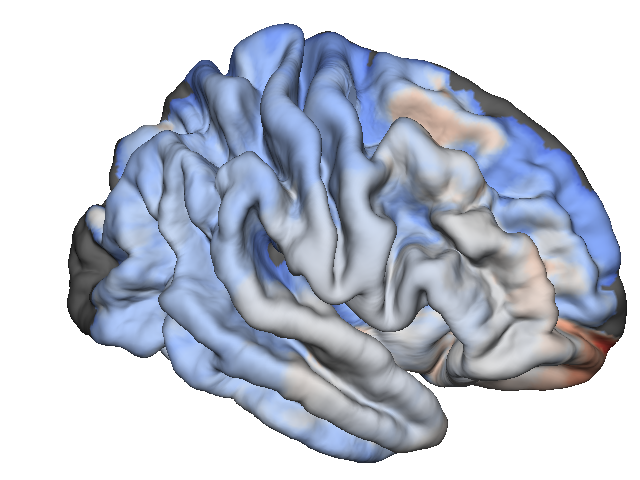

INFO:lmer:LMER summary
INFO:lmer:inferiortemporal               coef=0.061  p=0.0010
INFO:lmer:supramarginal                  coef=0.070  p=0.0116
INFO:lmer:middletemporal                 coef=0.072  p=0.0010
INFO:lmer:superiortemporal               coef=0.074  p=0.0066
INFO:lmer:postcentral                    coef=0.075  p=0.0169
INFO:lmer:                               coef=0.094
INFO:lmer:caudalmiddlefrontal            coef=0.122  p=0.0155
INFO:lmer:rostralmiddlefrontal           coef=0.133  p=0.0000
INFO:lmer:parstriangularis               coef=0.133  p=0.0005
INFO:lmer:parsopercularis                coef=0.137  p=0.0004
/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:79: RuntimeWarning: invalid value encountered in less
  x.data[0][x.data[0] < threshold[0]] = NaN


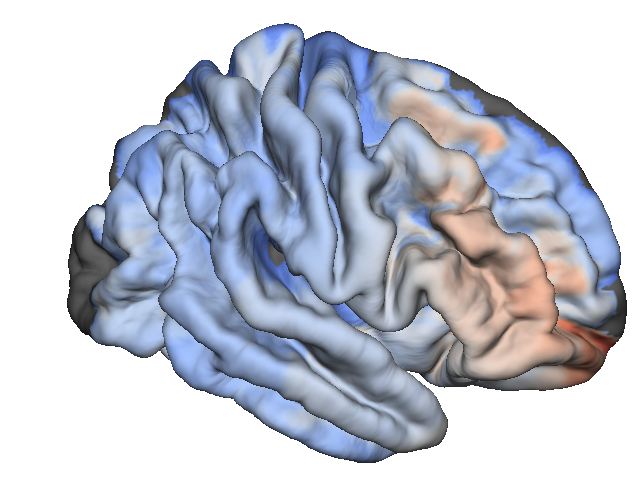

/home/gio/tools/phypno/phypno/attr/anat.py:84: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  pos[2] + neighb[p, 2]]
/home/gio/projects/spgr/scripts/spgr/stats_on_spindles.py:150: RuntimeWarning: invalid value encountered in true_divide
  chan_prob_n = chan_prob / diag
/home/gio/tools/venv/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/gio/tools/phypno/phypno/attr/anat.py:84: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  pos[2] + neighb[p, 2]]
/home/gio/tools/phypno/phypno/attr/anat.py:84: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  pos[2] + neighb[p, 2]]
/home/gio/tools/phypno/phypno/attr/anat.py:84: DeprecationWarning: using a non-integer number instead of an integer will result in an error

In [ ]:
lg.propagate = False
all_values = []

for REREF in ('avg', 15):
    for NORMALIZED_BY in ('source', 'target'):
        
        dataframe = {'subj': [], 'region': [], 'elec': [], 'value': []}
        for subj in HEMI_SUBJ:
            spindles = get_spindles(subj, reref=REREF, **SPINDLE_OPTIONS)
            spindle_group = create_spindle_groups(spindles)

            chan = get_chan_used_in_analysis(subj, 'sleep', chan_type=CHAN_TYPE, reref=REREF, **DATA_OPTIONS)
            chan_prob = create_spindle_cooccurrence_matrix(chan, spindle_group)
            chan_prob_per_chan = mean_spindle_cooccurrence(chan_prob, normalized_by=NORMALIZED_BY)

            morphed = get_morph_linear(subj, chan_prob_per_chan, reref=REREF)
            all_values.append(morphed)

            chan = get_chan_with_regions(subj, REREF)
            add_to_dataframe(dataframe, subj, chan_prob_per_chan, chan)    

        threshold = 0.01, None
        limits = 0, .2
        
        lg.propagate = True
        lmer(dataframe)
        lg.propagate = False

        v = plot_surf(all_values, threshold=threshold, limits=limits)
        png_name = 'cooccurrence_map_{}_{}.png'.format(NORMALIZED_BY, REREF)
        v.save(str(images_dir.joinpath(png_name)))
        display(v)
lg.propagate = True